___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Логистическая регрессия

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Данные

Однажды был проведён такой эксперимент - на 5000 участниках проверяли, как возраст и физическое здоровье влияют на потерю слуха, особенно на способность слышать высокие тона. Результаты этого эксперимента находятся в .csv-файле. У каждого участника есть возраст, оценка его физического здоровья, и результат аудио-теста (прошёл/не прошёл), проверяющего способность слышать высокие частоты. Сможем ли мы построить модель, которая будет предсказывать способность человека слышать высокие тона звука, основываясь только на его возрасте и физическом здоровье?

* Признаки

    * age - возраст участников, в годах
    * physical_score - оценка физического здоровья, полученная в результате физических тестов

* Целевая переменная (Label/Target)

    * test_result - 0 если аудио-тест не пройден, 1 если аудио-тест пройден

In [2]:
df = pd.read_csv('../DATA/hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


### Анализ и визуализация данных

В дополнение к предложенным здесь шагам, можете дополнительно исследовать данные при желании.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

/opt/anaconda3/envs/ML/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='test_result', ylabel='count'>

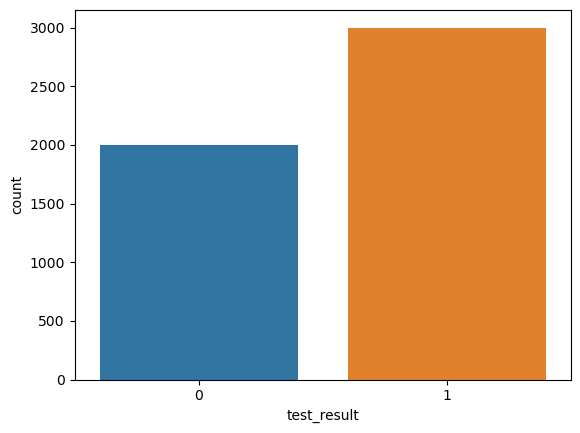

In [7]:
sns.countplot(df['test_result'])

<AxesSubplot:xlabel='test_result', ylabel='age'>

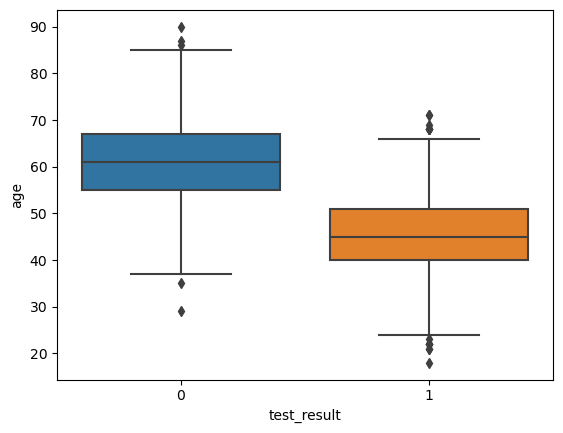

In [8]:
sns.boxplot(x='test_result',y='age',data=df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

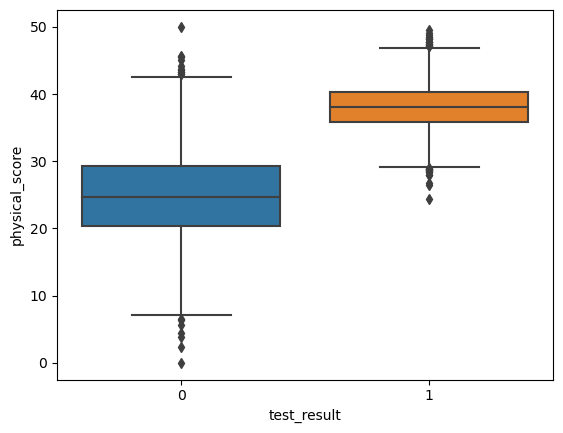

In [9]:
sns.boxplot(x='test_result',y='physical_score',data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

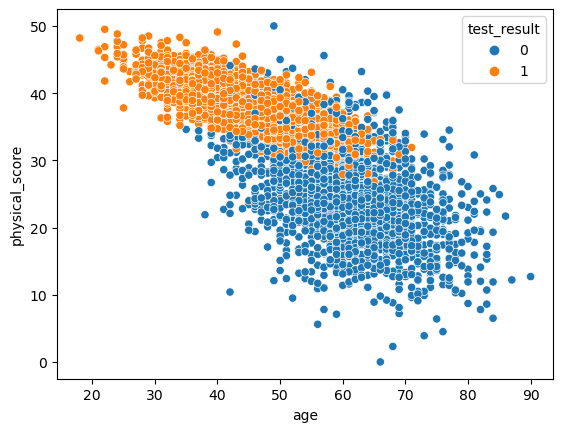

In [10]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result')

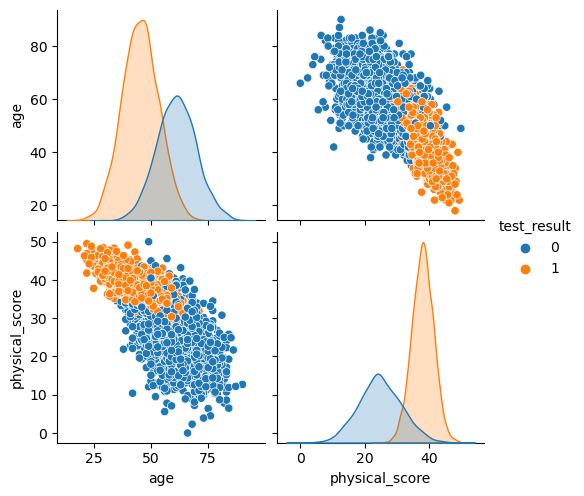

In [11]:
sns.pairplot(df,hue='test_result')

<AxesSubplot:>

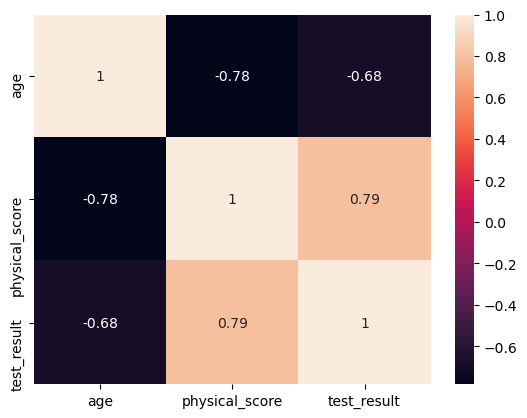

In [12]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

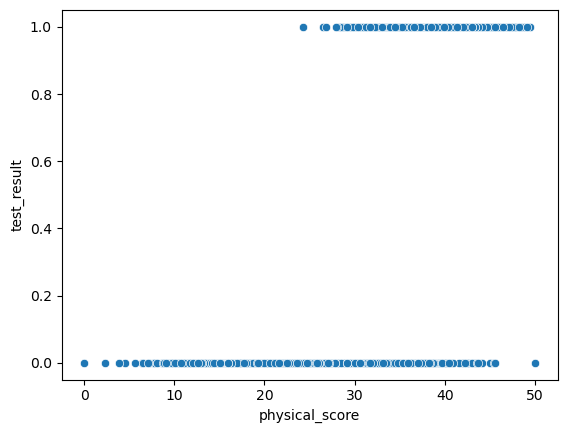

In [13]:
sns.scatterplot(x='physical_score',y='test_result',data=df)

<AxesSubplot:xlabel='age', ylabel='test_result'>

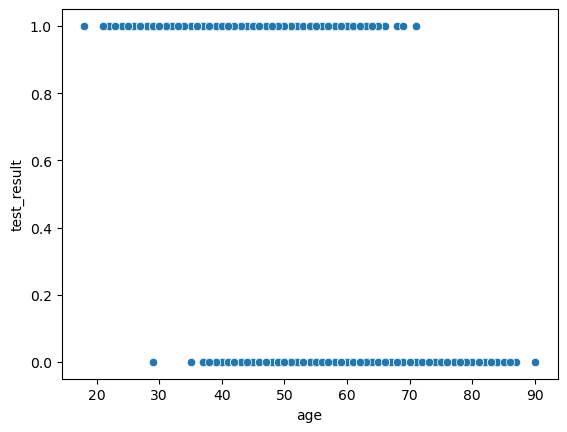

In [14]:
sns.scatterplot(x='age',y='test_result',data=df)

Различные виды графиков можно найти с помощью поиска в google! Например, поиск по фразе "3d matplotlib scatter plot" приведёт Вас к этой статье: https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

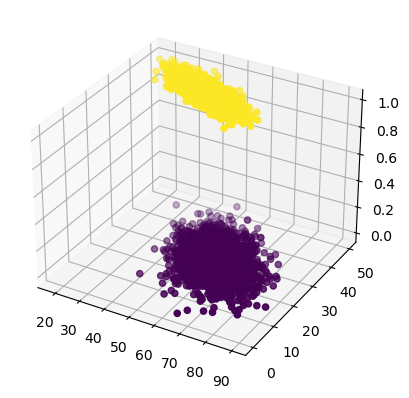

In [15]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

### Разбиение на обучающую и тестовую выборки, а также масштабирование данных

In [16]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [19]:
scaler = StandardScaler()

In [20]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Модель логистической регрессии

In [21]:
from sklearn.linear_model import LogisticRegressionCV , LogisticRegression

In [22]:
# help(LogisticRegression)

In [23]:
# help(LogisticRegressionCV)

In [24]:
log_model = LogisticRegressionCV()

In [25]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

### Интерпретация коэффициентов

На что обратить внимание:

* Эти коэффициенты характеризуют *шансы (odds)*, их нельзя интепретировать напрямую, как мы это делали для линейной регрессии.
* Мы обучали модель на *масштабированной* версии данных
* Намного проще понять и интерпретировать связь между коэффициентами (между одним коэффициентом и другом), чем связь между этими коэффициентами и целевой переменной.

Пожалуйста посмотрите видео-лекции по этой теме, а также почитайте следующие статьи:

* https://stats.idre.ucla.edu/stata/faq/how-do-i-interpret-odds-ratios-in-logistic-regression/
* https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

### Соотношение "odds ratio"

Для непрерывной независимой переменной, соотношение "odds ratio" вычисляется так:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/18dc1087bc50b9c1afee6820aad1858704b43ea3" >

Эта экспоненциальная связь служит интерпретацией для $$\beta _{1}$$ 

Шансы odds умножаются на $${e^{\beta _{1}}}$$ при каждом увеличении x на единицу.

In [26]:
log_model.C_

array([0.35938137])

In [27]:
log_model.coef_

array([[-0.96348842,  3.35442188]])

Чтобы получить соотношения "odds ratio", достаточно взять экспоненту от каждого из коэффициентов. Вы итоге мы можем понять, как увеличение или уменьшение на единицу той или иной переменной влияет на **шансы (odds)** пройти аудио-тест. 

In [28]:
# age,physical_score
np.exp(log_model.coef_[0])

array([ 0.38155952, 28.62904826])

Интерпретация:
* Мы можем ожидать, что **шансы (odds)** пройти аудио-тест **уменьшаются** (исходный коэффициент был отрицательный) при увеличении возраста на единицу.
* Мы можем ожидать, что **шансы (odds)** пройти аудио-тест **увеличиваются** (исходный коэффициент был положительный) при увеличении признака "физическое здоровье" на единицу.
* Сравнивая значения ratio между собой, мы видим, что признак physical_score обладает более сильной способностью влиять на предсказание, чем признак age.

### Точность модели на задачах классификации

In [29]:
#  ВНИМАНИЕ! В будущих версиях Scikit-Learn поменяется синтаксис для следующих методов:
#  - вместо plot_confusion_matrix нужно будет использовать ConfusionMatrixDisplay.from_estimator или ConfusionMatrixDisplay.from_predictions.
#  - вместо plot_precision_recall_curve нужно будет использовать PrecisionRecallDisplay.from_estimator и PrecisionRecallDisplay.from_predictions
#  - вместо plot_roc_curve нужно будет использовать RocCurveDisplay.from_estimator и RocCurveDisplay.from_predictions
#
#from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [30]:
y_pred = log_model.predict(scaled_X_test)

In [31]:
accuracy_score(y_test,y_pred)

0.932

In [32]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 13, 294]])

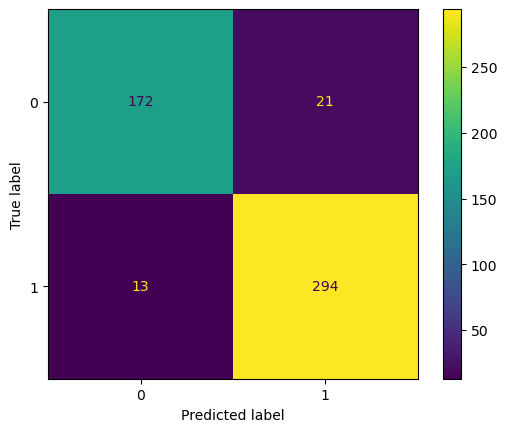

In [33]:
# ВНИМАНИЕ! В будущих версиях Scikit-Learn вместо plot_confusion_matrix нужно будет 
# использовать ConfusionMatrixDisplay.from_estimator или ConfusionMatrixDisplay.from_predictions 
#
#ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test)

plot_confusion_matrix(log_model,scaled_X_test,y_test)

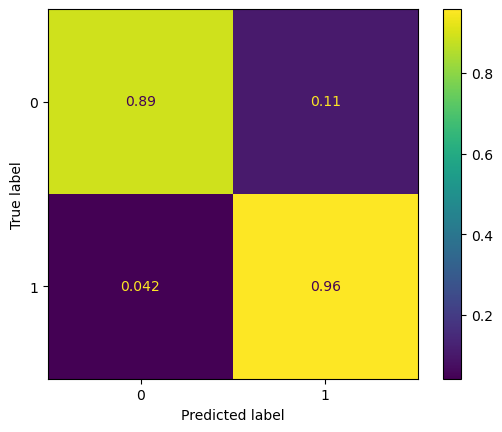

In [34]:
# Масштабированные данные: максимальное значение = 1

#ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test,normalize='true')

plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       193
           1       0.93      0.96      0.95       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [36]:
X_train.iloc[0]

age               32.0
physical_score    43.0
Name: 141, dtype: float64

In [37]:
y_train.iloc[0]

1

In [38]:
# 0% вероятность класса 0
# 100% вероятность класса 1
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[0., 1.]])

In [39]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

array([1])

## Изучаем график и область под графиком

**Подробности см. в видео-лекции!**

In [40]:
#  ВНИМАНИЕ! В будущих версиях Scikit-Learn поменяется синтаксис:
#
#from sklearn.metrics import precision_recall_curve,PrecisionRecallDisplay,RocCurveDisplay

from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

In [41]:
# Если эта команда выдаёт предупреждение "X has feature names, but LogisticRegressionCV was fitted without feature names",
# то дело в следующем - при обучении модели на вход в метод .fit() мы передавали не датафрейм, а массив scaled_X_train, который 
# получился в результате масштабирования данных. Однако здесь мы передаём датафрейм с названиями колонок.
# В принципе это работает без ошибок, это всего лишь предупреждение.
# Однако если хочется избежать этого предупреждения, то можно либо при обучении модели создавать датафрейм 
# с помощью pd.DataFrame(...,columns=...) и передавать в метод fit() уже датафрейм, либо наоборот, уже здесь вместо 
# датафрейма X_test передавать только значения X_test.values

y_score = log_model.decision_function(X_test)

In [42]:
y_score.shape

(500,)

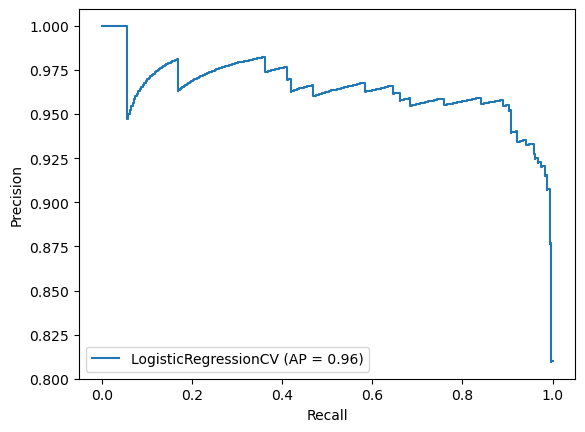

In [43]:
#  ВНИМАНИЕ! В будущих версиях Scikit-Learn поменяется синтаксис:
#
#PrecisionRecallDisplay.from_estimator(log_model,scaled_X_test,y_test)

plot_precision_recall_curve(log_model,scaled_X_test,y_test)

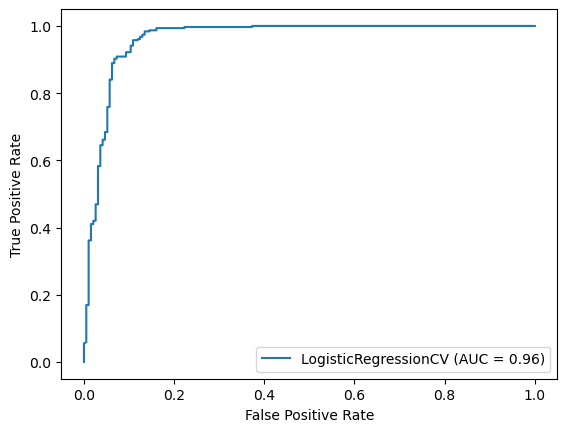

In [44]:
#  ВНИМАНИЕ! В будущих версиях Scikit-Learn поменяется синтаксис:
#
#RocCurveDisplay.from_estimator(log_model,scaled_X_test,y_test)

plot_roc_curve(log_model,scaled_X_test,y_test)

------
------